In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#try choropleth

# set the filepath and load in a shapefile
fp = "taxi_zones.shp"
map_df = gpd.read_file(fp)

#see the base map alone
#map_df


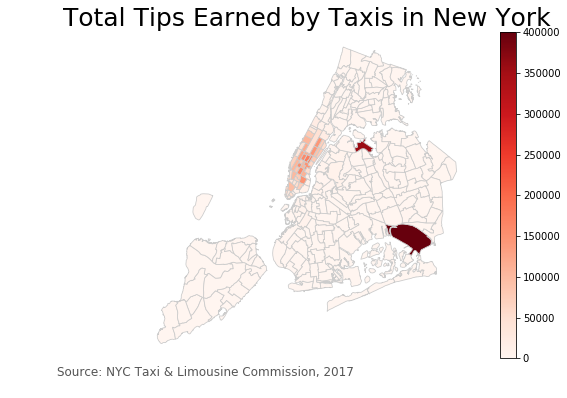

In [62]:
#map choropleth of total amount of tips received in all trips to taxi zones in NYC 

tips_each_zone = pd.read_csv("tips_each_zone.csv" ,low_memory=False, encoding = 'ISO-8859-1' )

# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('LocationID').join(tips_each_zone.set_index('PUzoneID'))
#merged

merged = map_df.set_index('LocationID').join(tips_each_zone.set_index('PUzoneID'))
#merged

variable = 'total_tip'

# set the range for the choropleth
vmin, vmax = 0, 400000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

ax.axis('off')

# add a title
ax.set_title('Total Tips Earned by Taxis in New York', fontdict={'fontsize': '25', 'fontweight': '3'})
# create an annotation for the data source
ax.annotate('Source: NYC Taxi & Limousine Commission, 2017',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
#plt.show()
fig.savefig('tips_each_zone.png', dpi=300)

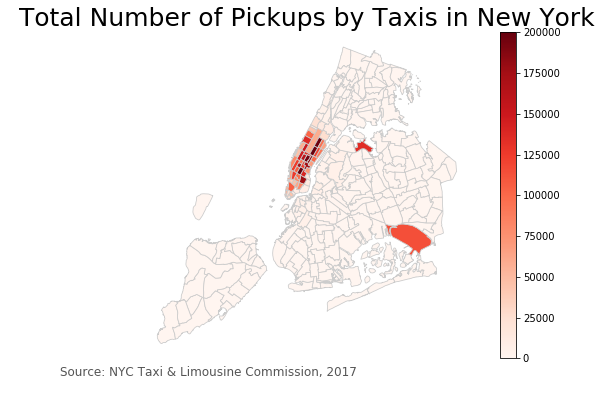

In [63]:
#map choropleth of total number of pickups received in all trips to taxi zones in NYC 

num_pickup = pd.read_csv("num_pickup.csv" ,low_memory=False, encoding = 'ISO-8859-1' )

# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('LocationID').join(num_pickup.set_index('PUzoneID'))
#merged

variable = 'num_pickup'

# set the range for the choropleth
vmin, vmax = 0, 200000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

ax.axis('off')

# add a title
ax.set_title('Total Number of Pickups by Taxis in New York', fontdict={'fontsize': '25', 'fontweight': '3'})
# create an annotation for the data source
ax.annotate('Source: NYC Taxi & Limousine Commission, 2017',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
#plt.show()
fig.savefig('num_pickup.png', dpi=300)